# Yes Bank Stock Closing Price Prediction

**Project Type:** EDA & Time Series Model(ARIMA and SARIMAX models)

# Project Summary:

**Yes Bank is a well known bank in Finance organisation.Since, 2018 having a fraud case involving Rana Kapoor was impacted based on Stock prices of the company. There were only few details such as Date based on month and year format and Opening price of the particular date and Highest and lowest prices in that month of particular year. Similarly, closing price which is the occupation of the speaker.**

# Github Link:

https://github.com/Ganesh-Kamma/yes_bank_close_price_prediction_arima/blob/main/yesbank_stock_closing_price.ipynb

# Business Problem:

**Predicting the Yes Bank stock's closing Price.**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.simplefilter("ignore")
from datetime import datetime

In [2]:
df=pd.read_csv("data_YesBank_StockPrices.csv")
df

,Date,Open,High,Low,Close
0,Jul-05,13.00,14.00,11.25,12.46
1,Aug-05,12.58,14.88,12.55,13.42
2,Sep-05,13.48,14.87,12.27,13.30
3,Oct-05,13.20,14.47,12.40,12.99
4,Nov-05,13.35,13.88,12.88,13.41
...,...,...,...,...,...
180,Jul-20,25.60,28.30,11.10,11.95
181,Aug-20,12.00,17.16,11.85,14.37
182,Sep-20,14.30,15.34,12.75,13.15
183,Oct-20,13.30,14.01,12.11,12.42


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 185 entries, 0 to 184
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    185 non-null    object 
 1   Open    185 non-null    float64
 2   High    185 non-null    float64
 3   Low     185 non-null    float64
 4   Close   185 non-null    float64
dtypes: float64(4), object(1)
memory usage: 7.4+ KB


In [4]:
df.isnull().sum()

Date     0
Open     0
High     0
Low      0
Close    0
dtype: int64

In [5]:
df.describe().round(2)

,Open,High,Low,Close
count,185.00,185.00,185.00,185.00
mean,105.54,116.10,94.95,105.20
std,98.88,106.33,91.22,98.58
min,10.00,11.24,5.55,9.98
25%,33.80,36.14,28.51,33.45
50%,62.98,72.55,58.00,62.54
75%,153.00,169.19,138.35,153.30
max,369.95,404.00,345.50,367.90


In [6]:
df1=df.copy(deep=True)
df1.head(2)

,Date,Open,High,Low,Close
0,Jul-05,13.00,14.00,11.25,12.46
1,Aug-05,12.58,14.88,12.55,13.42


In [7]:
#Converting Date Variable from object into datetime
df1["Date"]=pd.to_datetime(df1["Date"],format="%b-%y")
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 185 entries, 0 to 184
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    185 non-null    datetime64[ns]
 1   Open    185 non-null    float64       
 2   High    185 non-null    float64       
 3   Low     185 non-null    float64       
 4   Close   185 non-null    float64       
dtypes: datetime64[ns](1), float64(4)
memory usage: 7.4 KB


In [8]:
df1.head(2)

,Date,Open,High,Low,Close
0,2005-07-01,13.00,14.00,11.25,12.46
1,2005-08-01,12.58,14.88,12.55,13.42


In [9]:
df1.shape

(185, 5)

# Exploratory Data Analysis(EDA):

In [10]:
df1["month_name"]=df1["Date"].dt.month_name()
df1.head()

,Date,Open,High,Low,Close,month_name
0,2005-07-01,13.00,14.00,11.25,12.46,July
1,2005-08-01,12.58,14.88,12.55,13.42,August
2,2005-09-01,13.48,14.87,12.27,13.30,September
3,2005-10-01,13.20,14.47,12.40,12.99,October
4,2005-11-01,13.35,13.88,12.88,13.41,November


In [11]:
df1["year"]=df1["Date"].dt.year
df1.head(2)

,Date,Open,High,Low,Close,month_name,year
0,2005-07-01,13.00,14.00,11.25,12.46,July,2005
1,2005-08-01,12.58,14.88,12.55,13.42,August,2005


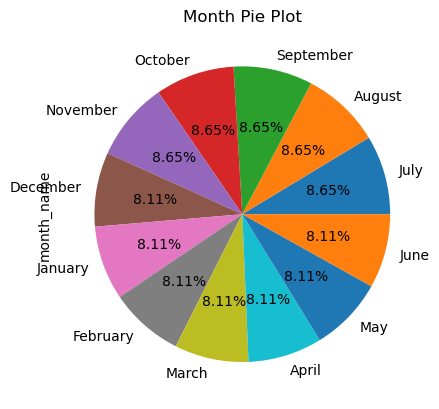

In [12]:
df1["month_name"].value_counts().plot(kind='pie',autopct="%0.2f%%")
plt.title("Month Pie Plot")
plt.show()

**By observing pie plot, there is no much difference on January to June but improved prices on July to November Data on 50% variation.**

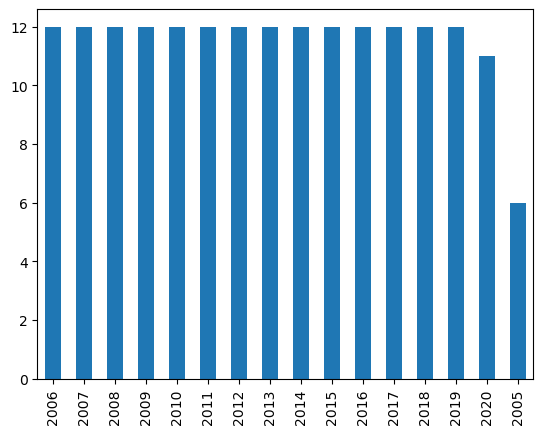

In [13]:
df1["year"].value_counts().plot(kind='bar')
plt.show()

**By observing Bar plot, there is no much difference from 2006 to 2019,whereas data on 2005 and 2020 contains some part of missing data i.e. 2005 starts from July but missed data from January to June, Similarly on 2020 missing data is only December month.**

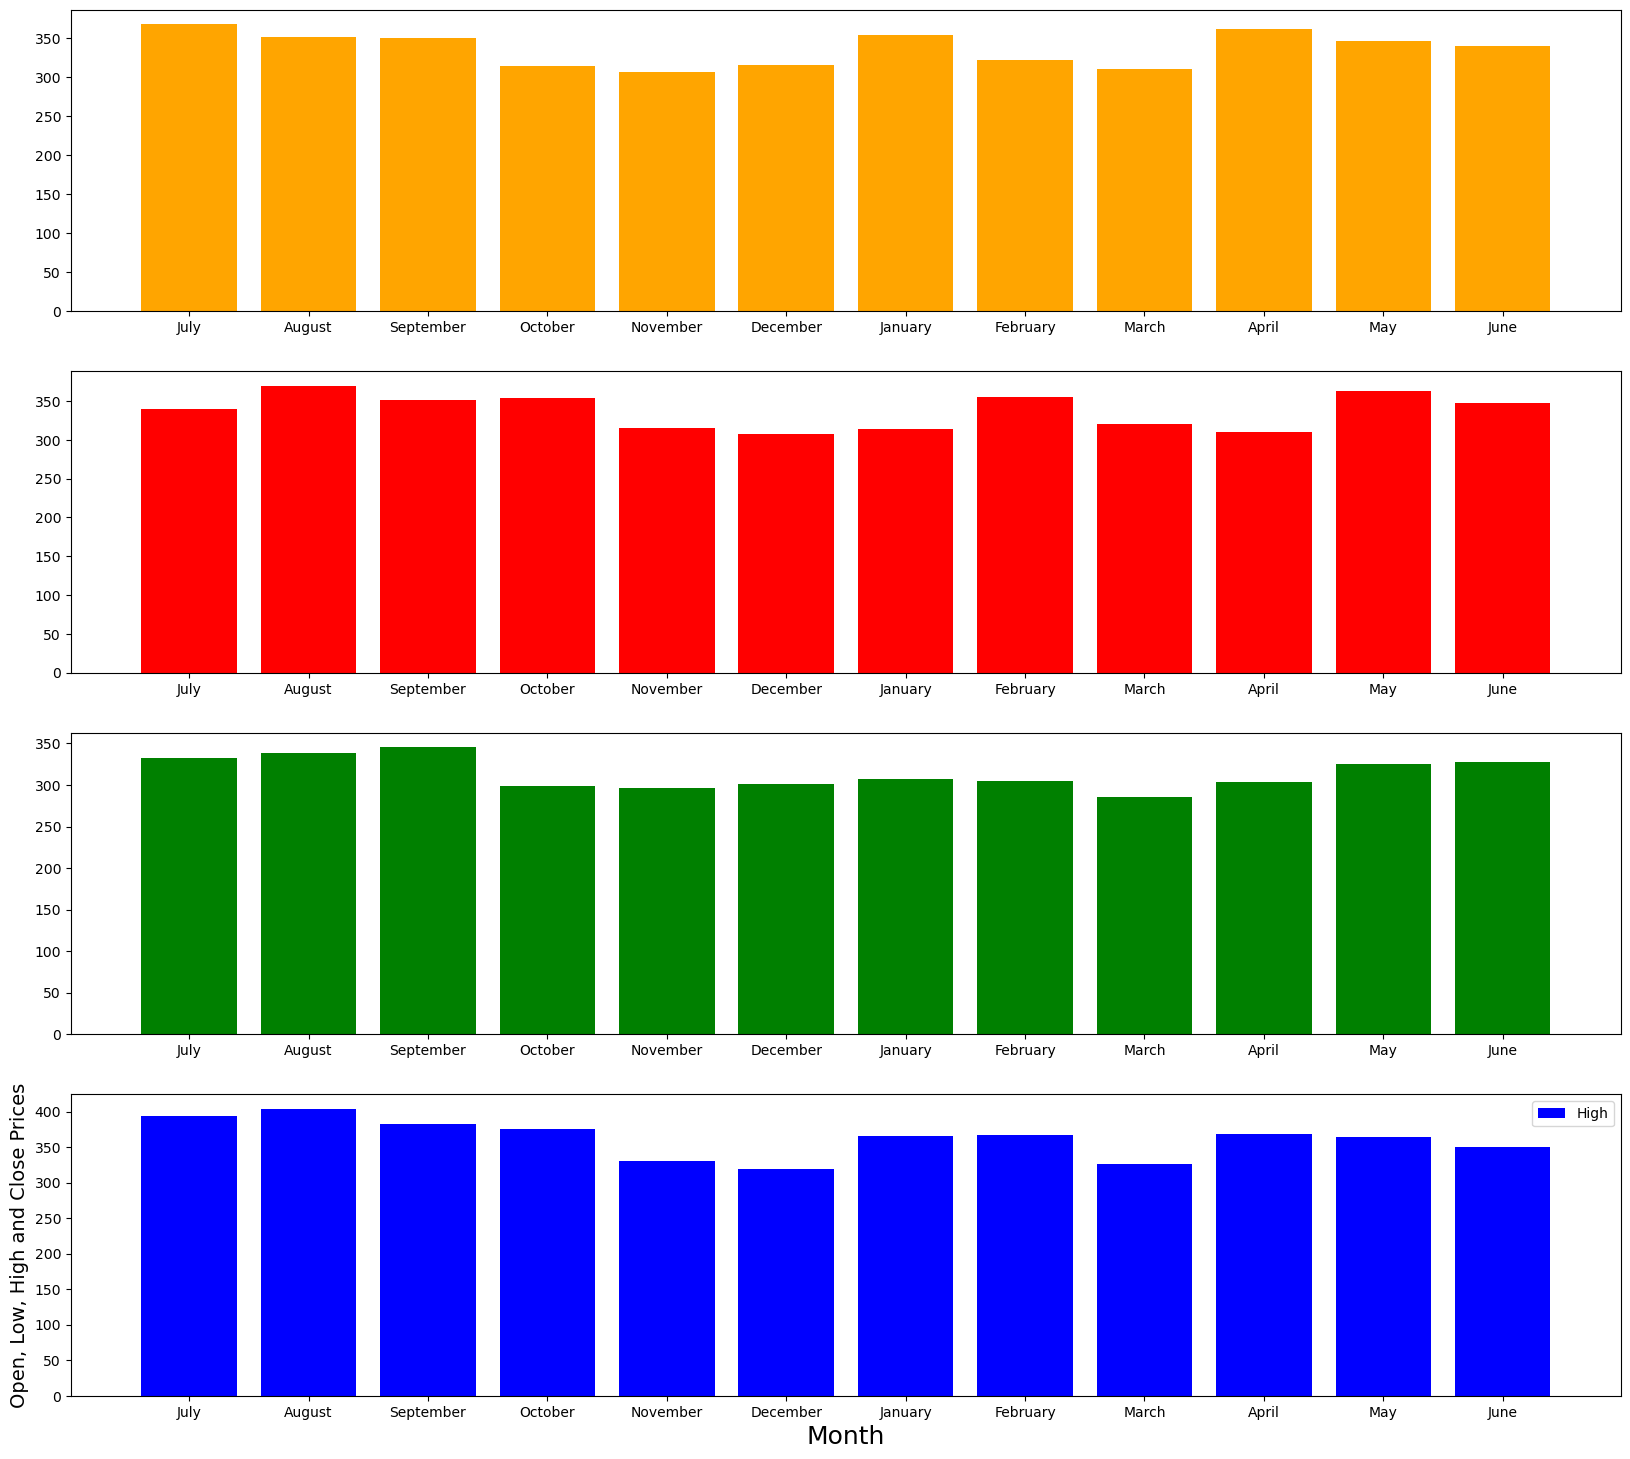

In [14]:
plt.figure(figsize=(18,14))
plt.subplot(4,1,1)
plt.bar(df1["month_name"],df1["Close"],color='orange',label="Close")
plt.subplot(4,1,2)
plt.bar(df1["month_name"],df1["Open"],color='red',label="Open")
plt.subplot(4,1,3)
plt.bar(df1["month_name"],df1["Low"],color='green',label="Low")
plt.subplot(4,1,4)
plt.bar(df1["month_name"],df1["High"],color='blue',label="High")
plt.xlabel("Month",color='black',fontsize=18)
plt.ylabel("Open, Low, High and Close Prices",color='black',fontsize=14)
plt.legend()
plt.show()

In [15]:
df1.head(2)

,Date,Open,High,Low,Close,month_name,year
0,2005-07-01,13.00,14.00,11.25,12.46,July,2005
1,2005-08-01,12.58,14.88,12.55,13.42,August,2005


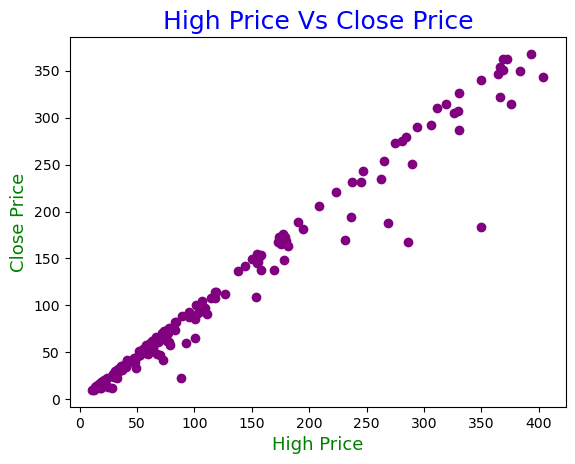

In [16]:
plt.scatter(df1["High"],df1["Close"],color='purple')
plt.title("High Price Vs Close Price",fontsize=18,color='b')
plt.xlabel("High Price",color='g',fontsize=13)
plt.ylabel("Close Price",color='g',fontsize=13)
plt.show()

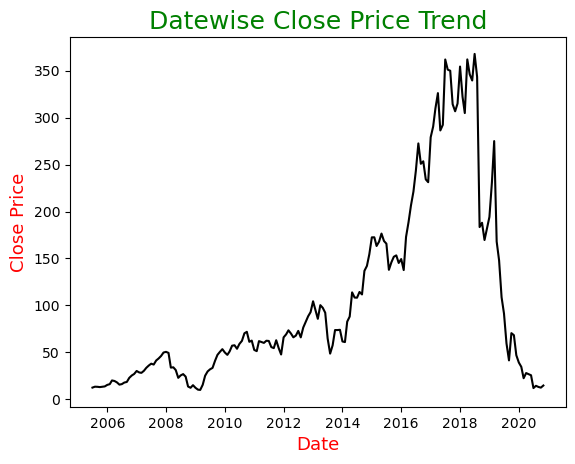

In [17]:
plt.plot("Date","Close",data=df1,color='black')
plt.title("Datewise Close Price Trend",color='g',fontsize=18)
plt.xlabel("Date",color='r',fontsize=13)
plt.ylabel("Close Price",color='r',fontsize=13)
plt.show()

In [18]:
df1["Date"].head(6)

0   2005-07-01
1   2005-08-01
2   2005-09-01
3   2005-10-01
4   2005-11-01
5   2005-12-01
Name: Date, dtype: datetime64[ns]

In [19]:
fir_6_mons=df1.loc[:5,"Date":"Close"]
fir_6_mons

,Date,Open,High,Low,Close
0,2005-07-01,13.00,14.00,11.25,12.46
1,2005-08-01,12.58,14.88,12.55,13.42
2,2005-09-01,13.48,14.87,12.27,13.30
3,2005-10-01,13.20,14.47,12.40,12.99
4,2005-11-01,13.35,13.88,12.88,13.41
5,2005-12-01,13.49,14.44,13.00,13.71


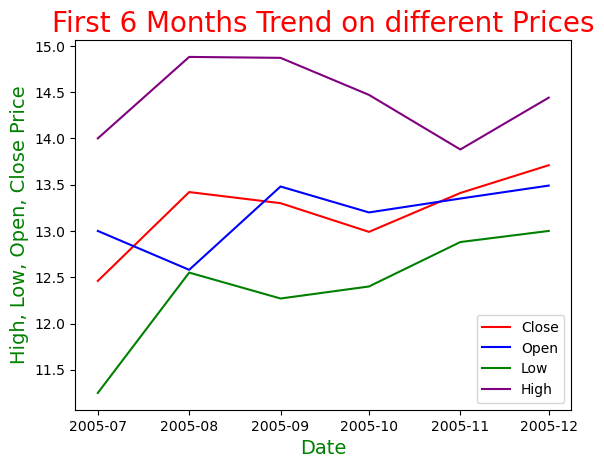

In [20]:
plt.plot("Date","Close",data=fir_6_mons,color='red',label="Close")
plt.plot("Date","Open",data=fir_6_mons,color='blue',label="Open")
plt.plot("Date","Low",data=fir_6_mons,color='green',label="Low")
plt.plot("Date","High",data=fir_6_mons,color='purple',label="High")
plt.title("First 6 Months Trend on different Prices",color='r',fontsize=20)
plt.xlabel("Date",color='g',fontsize=14)
plt.ylabel("High, Low, Open, Close Price",color='g',fontsize=14)
plt.legend()
plt.show()

In [21]:
trend_2006_data=df1.loc[6:17,"Date":"Close"]
trend_2006_data

,Date,Open,High,Low,Close
6,2006-01-01,13.68,17.16,13.58,15.33
7,2006-02-01,15.50,16.97,15.40,16.12
8,2006-03-01,16.20,20.95,16.02,20.08
9,2006-04-01,20.56,20.80,18.02,19.49
10,2006-05-01,19.80,21.80,15.80,18.03
11,2006-06-01,18.20,18.40,13.40,15.62
12,2006-07-01,16.00,17.20,13.82,16.16
13,2006-08-01,15.90,18.60,15.70,17.84
14,2006-09-01,18.00,18.88,16.80,18.46
15,2006-10-01,18.78,24.20,18.50,22.78


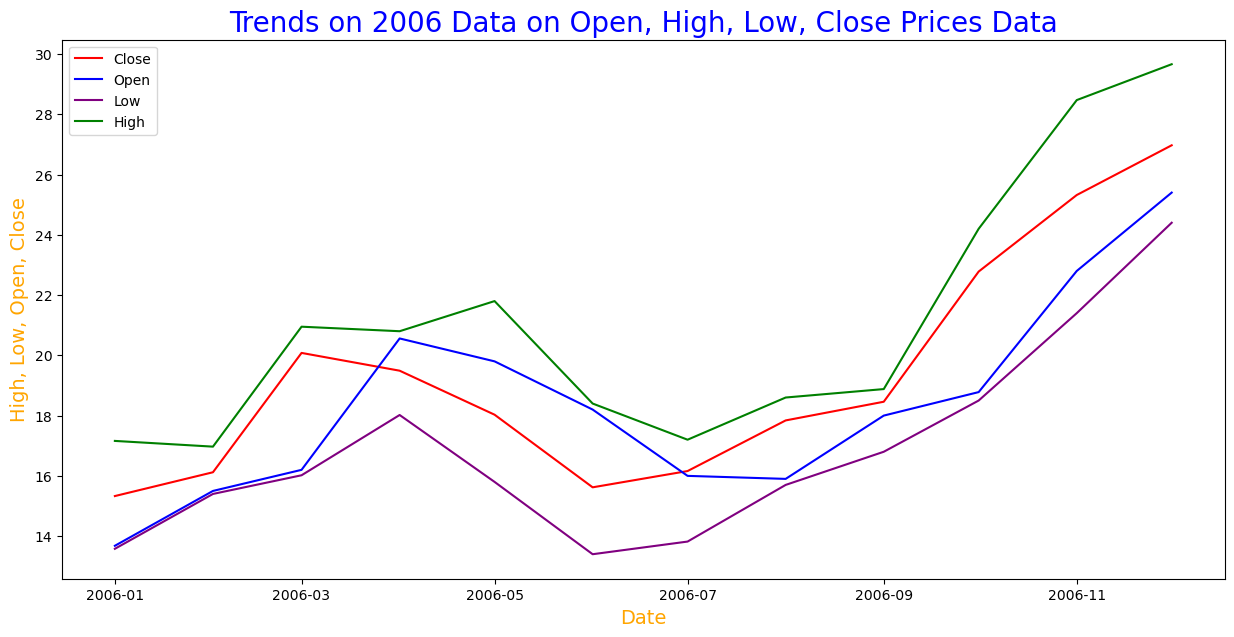

In [22]:
plt.figure(figsize=(15,7))
plt.plot("Date","Close",data=trend_2006_data,color='red',label="Close")
plt.plot("Date","Open",data=trend_2006_data,color='blue',label="Open")
plt.plot("Date","Low",data=trend_2006_data,color='purple',label="Low")
plt.plot("Date","High",data=trend_2006_data,color='green',label="High")
plt.title("Trends on 2006 Data on Open, High, Low, Close Prices Data",color='b',fontsize=20)
plt.xlabel("Date",color='orange',fontsize=14)
plt.ylabel("High, Low, Open, Close",color='orange',fontsize=14)
plt.legend()
plt.show()

**The Close price, Open price, Low price and High Price all these were having no difference with respect to Months on 2006, By observing the above plot noted below:**
- **From January to April Stocks prices are increasing and**
- **From May to August Stocks prices are decreasing and**
- **From September to December Stocks prices are heavily increasing with little variation of all prices.**
- **Only Open price is no increment on July and August months on 2006.**

**Trend is increasing or upward trend in 2006 data.**

In [23]:
df1.tail(5)

,Date,Open,High,Low,Close,month_name,year
180,2020-07-01,25.60,28.30,11.10,11.95,July,2020
181,2020-08-01,12.00,17.16,11.85,14.37,August,2020
182,2020-09-01,14.30,15.34,12.75,13.15,September,2020
183,2020-10-01,13.30,14.01,12.11,12.42,October,2020
184,2020-11-01,12.41,14.90,12.21,14.67,November,2020


In [24]:
trend_06_19_data=df1.loc[6:173,"Date":"Close"]
trend_06_19_data

,Date,Open,High,Low,Close
6,2006-01-01,13.68,17.16,13.58,15.33
7,2006-02-01,15.50,16.97,15.40,16.12
8,2006-03-01,16.20,20.95,16.02,20.08
9,2006-04-01,20.56,20.80,18.02,19.49
10,2006-05-01,19.80,21.80,15.80,18.03
...,...,...,...,...,...
169,2019-08-01,89.20,92.40,53.15,59.50
170,2019-09-01,59.50,72.55,40.95,41.45
171,2019-10-01,42.00,76.65,29.05,70.45
172,2019-11-01,71.00,75.35,59.95,68.30


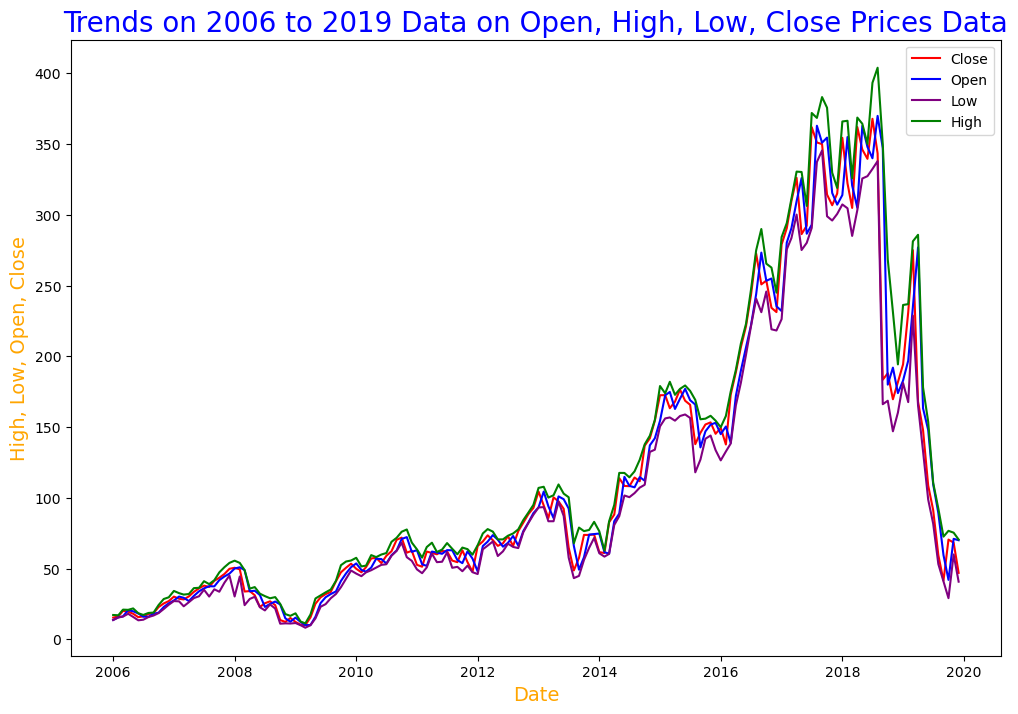

In [25]:
plt.figure(figsize=(12,8))
plt.plot("Date","Close",data=trend_06_19_data,color='red',label="Close")
plt.plot("Date","Open",data=trend_06_19_data,color='blue',label="Open")
plt.plot("Date","Low",data=trend_06_19_data,color='purple',label="Low")
plt.plot("Date","High",data=trend_06_19_data,color='green',label="High")
plt.title("Trends on 2006 to 2019 Data on Open, High, Low, Close Prices Data",color='b',fontsize=20)
plt.xlabel("Date",color='orange',fontsize=14)
plt.ylabel("High, Low, Open, Close",color='orange',fontsize=14)
plt.legend()
plt.show()

**Comparing the Cost price, Low price, High price and Open price with respect to years from 2006 to 2019 December, all the prices were having same trend by observing above plot and few points are noted below:**
- The prices were low on consecutive years from 2006 to 2015 but having slowly increasing trend from 10 to 150 currency price but we have seen a drastic change from 2016 to 2018 years from 150 upto 400 and its highest currency price and due to covid the stocks become very low.
- The overall trend is upwards.

In [26]:
trend_2020_data=df1.loc[174:,"Date":"Close"]
trend_2020_data

,Date,Open,High,Low,Close
174,2020-01-01,46.90,48.50,36.55,39.20
175,2020-02-01,39.10,40.70,33.60,34.55
176,2020-03-01,35.20,87.95,5.55,22.45
177,2020-04-01,22.30,30.45,20.30,27.95
178,2020-05-01,27.80,31.60,25.20,26.85
179,2020-06-01,27.75,31.95,25.55,25.60
180,2020-07-01,25.60,28.30,11.10,11.95
181,2020-08-01,12.00,17.16,11.85,14.37
182,2020-09-01,14.30,15.34,12.75,13.15
183,2020-10-01,13.30,14.01,12.11,12.42


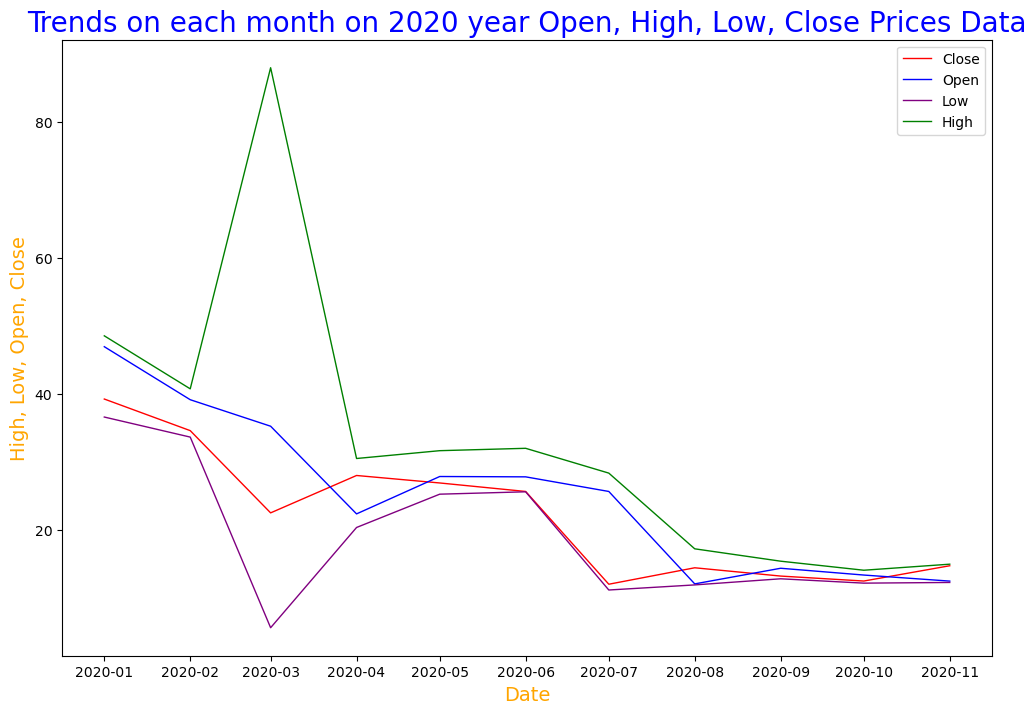

In [27]:
plt.figure(figsize=(12,8))
plt.plot("Date","Close",data=trend_2020_data,color='red',label="Close",lw=1)
plt.plot("Date","Open",data=trend_2020_data,color='blue',label="Open",lw=1)
plt.plot("Date","Low",data=trend_2020_data,color='purple',label="Low",lw=1)
plt.plot("Date","High",data=trend_2020_data,color='green',label="High",lw=1)
plt.title("Trends on each month on 2020 year Open, High, Low, Close Prices Data",
          color='b',fontsize=20)
plt.xlabel("Date",color='orange',fontsize=14)
plt.ylabel("High, Low, Open, Close",color='orange',fontsize=14)
plt.legend()
plt.show()

**By observing the above plots among all prices on 2020 from January to till November, few points are noted below:**
- There is much variation on February to March with High price is from 45 to 90 whereas Low price was from 38 to 5 rupees, Similarly on March to April with High price is 90 to 37 where as Low price was from 5 to 20 rupees.
- From August to November there is almost having same prices 
- Overall trend is Downward started from June to November in 2020.

In [28]:
df2=df1[["Date","Open","High","Low","Close"]].set_index("Date")
df2

,Open,High,Low,Close
Date,,,,
2005-07-01,13.00,14.00,11.25,12.46
2005-08-01,12.58,14.88,12.55,13.42
2005-09-01,13.48,14.87,12.27,13.30
2005-10-01,13.20,14.47,12.40,12.99
2005-11-01,13.35,13.88,12.88,13.41
...,...,...,...,...
2020-07-01,25.60,28.30,11.10,11.95
2020-08-01,12.00,17.16,11.85,14.37
2020-09-01,14.30,15.34,12.75,13.15


# Checking on Time Series Models: 
- **1) ARIMA Model**
- **2) SARIMAX Model**

# Checking Data having Stationarity Problem:

**1) Rolling Statistics Method:**

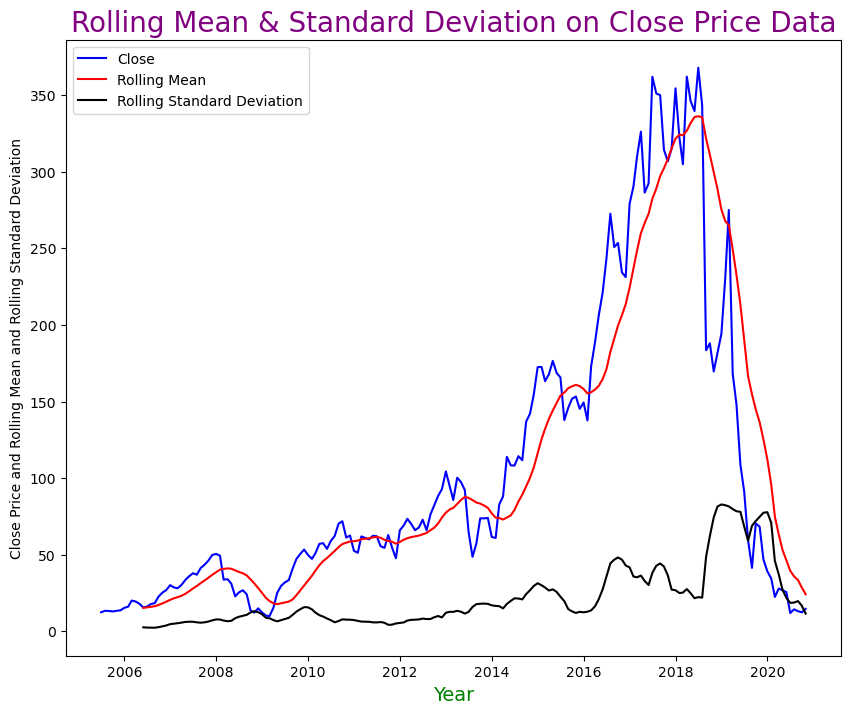

In [29]:
rol_mean=df2["Close"].rolling(window=12).mean()
rol_std=df2["Close"].rolling(window=12).std()
plt.figure(figsize=(10,8))
plt.plot(df2["Close"],color='blue',label='Close')
plt.plot(rol_mean,color='red',label='Rolling Mean')
plt.plot(rol_std,color='black',label='Rolling Standard Deviation')
plt.title("Rolling Mean & Standard Deviation on Close Price Data",color='purple',fontsize=20)
plt.xlabel("Year",color='g',fontsize=14)
plt.ylabel("Close Price and Rolling Mean and Rolling Standard Deviation")
plt.legend()
plt.show()

**By observing the above plot, Rolling Mean is parallel with the Close price but Rolling Standard Deviation is having much deviation from 2018 to 2020 years.**

**2) Augmented Dickey Fuller Test:**

**For ADF Test: always H0 shows that Data is Non-Stationary and H1 shows that Data is Stationary.**

In [30]:
from statsmodels.tsa.stattools import adfuller
adfuller_res=adfuller(df2["Close"])
print("p-value on ADF Test:",adfuller_res[1])

p-value on ADF Test: 0.32905208150043974


# Converting the Data from Non-Stationary to Stationary Data:

**Differencing:**

In [31]:
#Apply Differencing:
diff_data=df2["Close"]-df2["Close"].shift(8)
diff_data.dropna(inplace=True)
#Applying ADF-Test:
adfuller_test=adfuller(diff_data)
print("p-value of ADF-Test:",adfuller_test[1])

p-value of ADF-Test: 0.017471798304089327


**Now the data is Stationary, Since the p-value is less than 5%.**

In [32]:
diff_data

Date
2006-03-01     7.62
2006-04-01     6.07
2006-05-01     4.73
2006-06-01     2.63
2006-07-01     2.75
              ...  
2020-07-01   -56.35
2020-08-01   -32.58
2020-09-01   -26.05
2020-10-01   -22.13
2020-11-01    -7.78
Name: Close, Length: 177, dtype: float64

# ARMA Model
- It is used to forecast timeseries using both the past values and the error.
- p is Auto Regressive (AR) term
- q is Moving Average (MA) term

# ACF (Auto Correlation Function):
- **ACF is the Coefficient of Correlation b/w the value of a point at a Current time and its value at lagg p.**

# PACF (Partial Auto Correlation Function):
- **PACF is similar to ACF, but the intermediate laggs b/w t and t-p are removed, i.e. Correlation b/w Y(t) and Y(t-p) with p-1 laggs excluded.**

# Plot ACF & PACF Curves and finding p,d,q parameters:

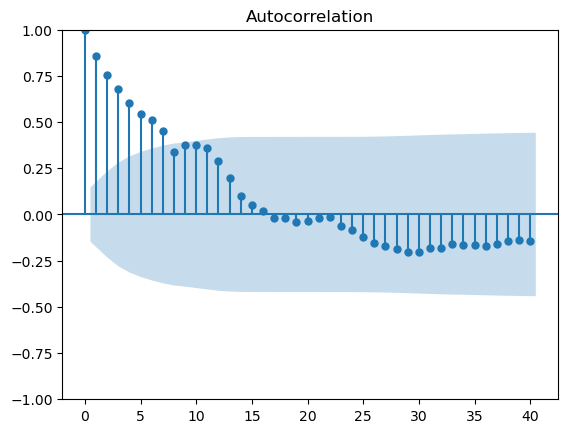

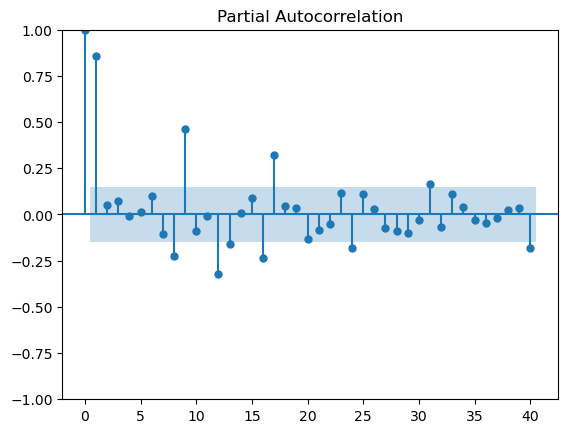

In [33]:
from statsmodels.tsa.stattools import acf,pacf
import statsmodels.api as sm
fig1=sm.graphics.tsa.plot_acf(diff_data,lags=40)
fig2=sm.graphics.tsa.plot_pacf(diff_data,lags=40)

**From ACF(Auto Correlation Function) Curve, Optimal value of q value shows 1 and from PACF(Partially Auto Correlation Function) Curve, Optimal value of p shows 1.**

In [34]:
diff_data.shape

(177,)

In [35]:
y_train=diff_data[:142]
y_test=diff_data[142:]

In [36]:
y_train

Date
2006-03-01      7.62
2006-04-01      6.07
2006-05-01      4.73
2006-06-01      2.63
2006-07-01      2.75
               ...  
2017-08-01    119.89
2017-09-01     70.90
2017-10-01     23.79
2017-11-01     -3.02
2017-12-01    -11.09
Name: Close, Length: 142, dtype: float64

In [37]:
y_test

Date
2018-01-01     68.07
2018-02-01     29.88
2018-03-01    -57.06
2018-04-01     10.90
2018-05-01     -3.80
2018-06-01     25.25
2018-07-01     61.10
2018-08-01     28.35
2018-09-01   -171.00
2018-10-01   -134.20
2018-11-01   -135.25
2018-12-01   -180.30
2019-01-01   -151.90
2019-02-01   -108.40
2019-03-01    -92.85
2019-04-01   -175.40
2019-05-01    -35.50
2019-06-01    -79.35
2019-07-01    -78.35
2019-08-01   -122.25
2019-09-01   -152.85
2019-10-01   -160.75
2019-11-01   -206.75
2019-12-01   -121.05
2020-01-01   -108.75
2020-02-01    -74.15
2020-03-01    -68.85
2020-04-01    -31.55
2020-05-01    -14.60
2020-06-01    -44.85
2020-07-01    -56.35
2020-08-01    -32.58
2020-09-01    -26.05
2020-10-01    -22.13
2020-11-01     -7.78
Name: Close, dtype: float64

# Model-1: Auto Regressive Moving Average (ARIMA):

**ARIMA Model is build by using p,d,q values.**
- p is AR(Auto Regression) Model (Determined from PACF plot)
- d is Integration.
- q is MA(Moving Average) value (Determined from ACF plot).

In [38]:
from statsmodels.tsa.arima.model import ARIMA
arima_model=ARIMA(diff_data,order=(12,1,7))
ARIMA=arima_model.fit()
ypred_test_arima_model=ARIMA.predict(start=y_test.index[0], end=y_test.index[-1])
ypred_train_arima_model=ARIMA.predict(start=y_train.index[0],end=y_train.index[-1])
from sklearn.metrics import r2_score
print("Train R2 on ARIMA Model:",r2_score(y_train,ypred_train_arima_model))
print("Test R2 on ARIMA Model:",r2_score(y_test,ypred_test_arima_model))

C:\Users\HI\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\HI\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\HI\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\HI\anaconda3\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Train R2 on ARIMA Model: 0.8418229882783504
Test R2 on ARIMA Model: 0.798001696401436


**In above case the ARIMA model R2 score, By observing the ACF and PACF plots, should be improved by changing the values of p from 1 to 12 and q values from 1 to 7. But the d value is 1 because there only 1 time difference done.**

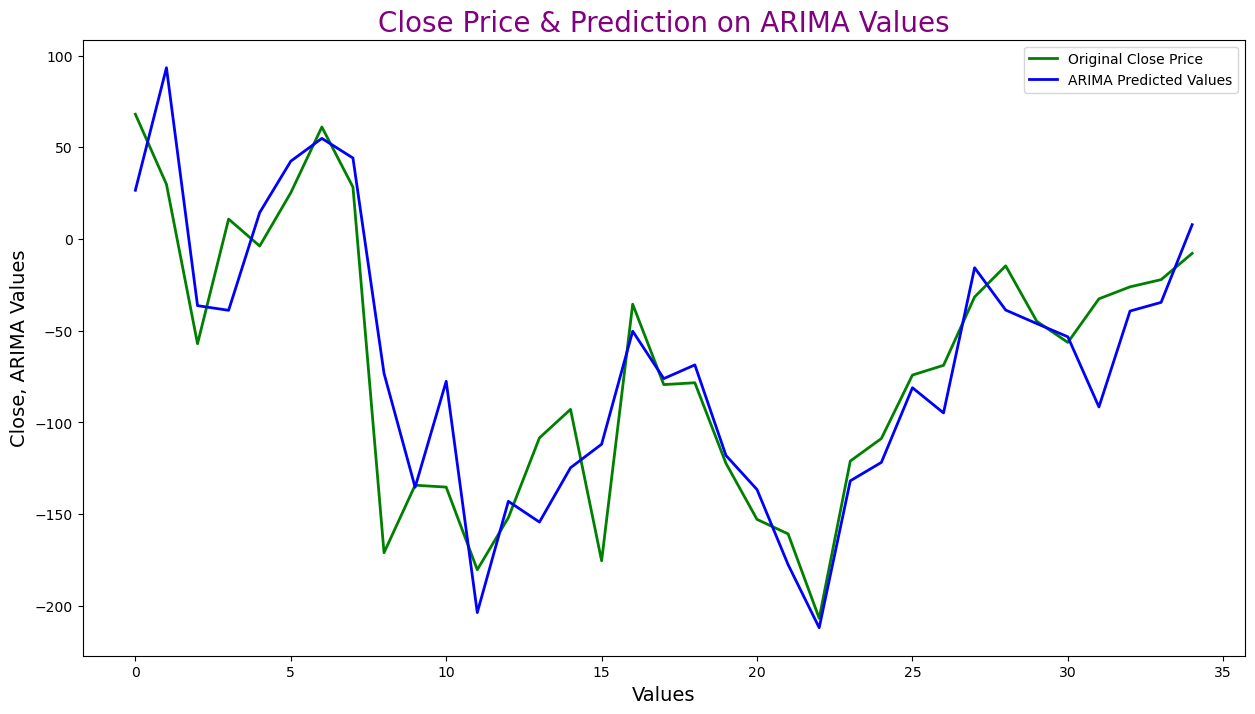

In [39]:
plt.figure(figsize=(15,8))
plt.plot(y_test.values,color='g',label="Original Close Price",lw=2)
plt.plot(ypred_test_arima_model.values,color='b',label='ARIMA Predicted Values',lw=2)
plt.title("Close Price & Prediction on ARIMA Values",color='purple',fontsize=20)
plt.xlabel("Values",color='black',fontsize=14)
plt.ylabel("Close, ARIMA Values",color='black',fontsize=14)
plt.legend()
plt.show()

# Model-2: SARIMAX (Seasonal Auto Regressive Integrated Moving Average and eXogeneous regression)Model:
- **Whenever, there is seasonality in given data, apply SARIMAX.**
- **SARIMAX Model is build by p,d,q,s values.**
- **p is AR value (PACF plot)**
- **d is Integration**
- **q is MA value (ACF plot)**
- **s is Seasonality value.**

In [40]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
sarimax_model=SARIMAX(diff_data,seasonal_order=(12,1,7,12))
SARIMAX=sarimax_model.fit()
ypred_train_sarimax_model=SARIMAX.predict(start=y_train.index[0],end=y_train.index[-1])
ypred_test_sarimax_model=SARIMAX.predict(start=y_test.index[0],end=y_test.index[-1])
print("Train R2 on SARIMAX Model:",r2_score(y_train,ypred_train_sarimax_model))
print("Test R2 on SARIMAX Model:",r2_score(y_test,ypred_test_sarimax_model))

C:\Users\HI\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\HI\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\HI\anaconda3\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Train R2 on SARIMAX Model: 0.758298216485715
Test R2 on SARIMAX Model: 0.43708811904920497


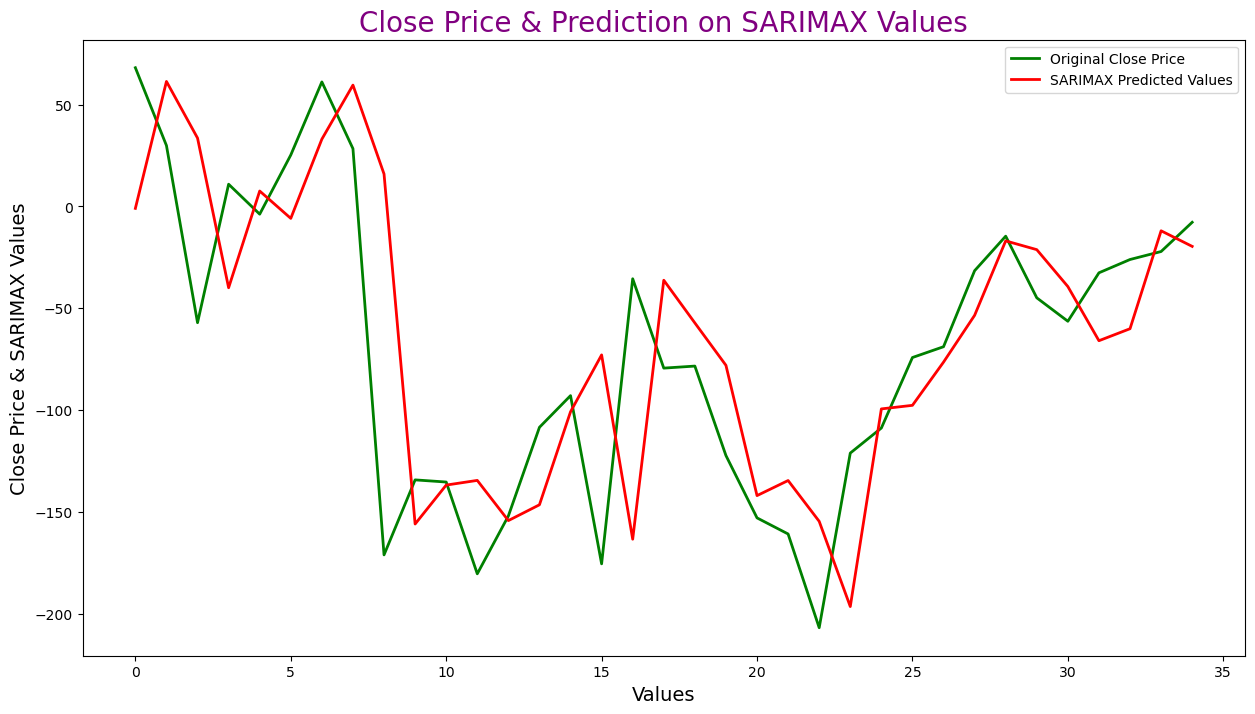

In [41]:
plt.figure(figsize=(15,8))
plt.plot(y_test.values,color='g',label="Original Close Price",lw=2)
plt.plot(ypred_test_sarimax_model.values,color='r',label='SARIMAX Predicted Values',lw=2)
plt.title("Close Price & Prediction on SARIMAX Values",color='purple',fontsize=20)
plt.xlabel("Values",color='black',fontsize=14)
plt.ylabel("Close Price & SARIMAX Values",color='black',fontsize=14)
plt.legend()
plt.show()

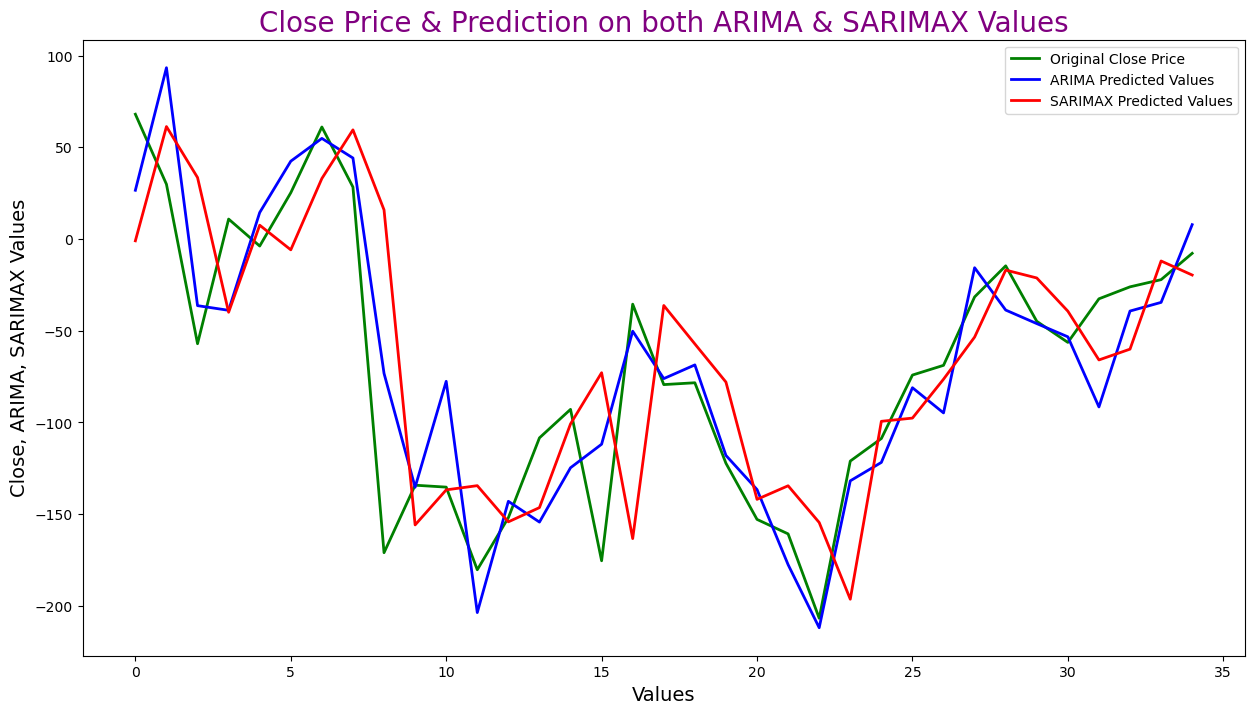

In [42]:
plt.figure(figsize=(15,8))
plt.plot(y_test.values,color='g',label="Original Close Price",lw=2)
plt.plot(ypred_test_arima_model.values,color='b',label='ARIMA Predicted Values',lw=2)
plt.plot(ypred_test_sarimax_model.values,color='r',label='SARIMAX Predicted Values',lw=2)
plt.title("Close Price & Prediction on both ARIMA & SARIMAX Values",color='purple',fontsize=20)
plt.xlabel("Values",color='black',fontsize=14)
plt.ylabel("Close, ARIMA, SARIMAX Values",color='black',fontsize=14)
plt.legend()
plt.show()

# Conclusion:
**ARIMA model gives the best result on comparing with SARIMAX r-square score.**